# sklearn 

## linear regression（线性回归）

用sklearn实现线性回归（linear regression）

数据集采用人工生成的办法，一条直线上的随机数据加上一点噪声

In [209]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# 固定种子，方便结果复现
np.random.seed(77)

展示生成的数据

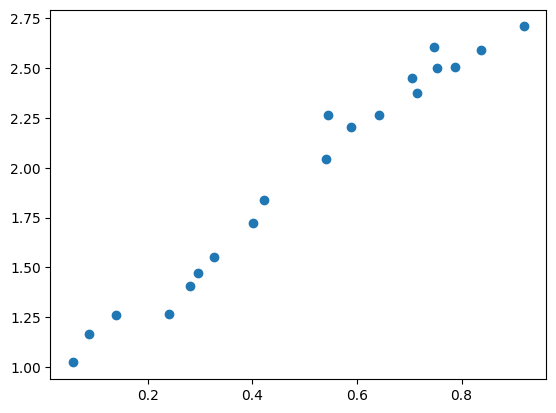

In [210]:
data_size = 20
x = np.random.rand(data_size)
func = lambda x: 2*x + 1
y = func(x) + np.random.randn(data_size)*0.1

plt.scatter(x, y)
plt.show()

用sklean库实现线性回归，画出拟合曲线

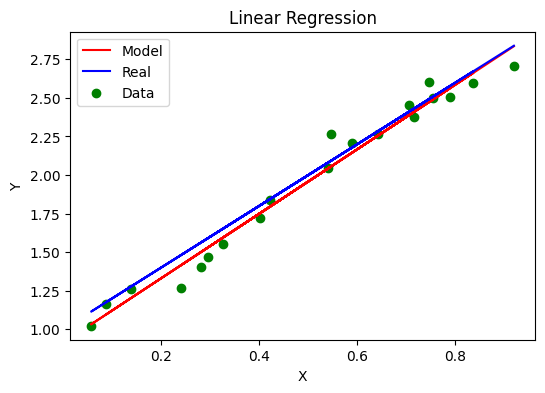

In [213]:
from sklearn.linear_model import LinearRegression

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

linear_model = LinearRegression()
linear_model.fit(x, y)
plt.figure(figsize=(6, 4))
plt.plot(x, linear_model.predict(x), color='red', label='Model')
plt.plot(x, func(x), color='blue', label='Real')
plt.scatter(x, y, color='green', label='Data')
plt.legend(loc='best')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


## polynomial regression（多项式回归）

对于多项式回归，我们可以用多项式函数来拟合数据，即用$y=a_0+a_1x+a_2x^2+...+a_nx^n$来拟合数据。

假设我们有一组数据$(x_i,y_i)$，其中$x_i$是输入变量，$y_i$是输出变量。我们希望找到一组多项式函数$y=a_0+a_1x+a_2x^2+...+a_nx^n$，使得$y_i$与$y$的误差最小。

理论上，多项式回归可以得到泰勒展开的前n项。

我们制造一组数据，然后对比不同幂次的多项式回归结果。

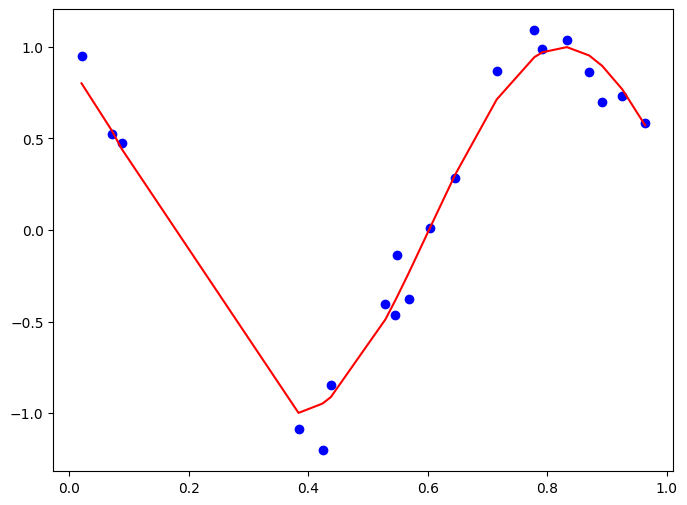

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Generate data
np.random.seed(0)
X = np.random.rand(20, 1)
X.sort(axis=0)
func = lambda x: np.cos(7 * x + 0.5)
y = func(X) + np.random.randn(20, 1)*0.1

# Plot data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, func(X), color='red')
plt.show()

接下来用不同的幂次进行拟合，并用cross validation（交叉验证）来评估模型的好坏。

Degree 1: MSE score = -0.6072853677290424
Degree 2: MSE score = -0.0625056831997707
Degree 10: MSE score = -1.573676954796636e+19


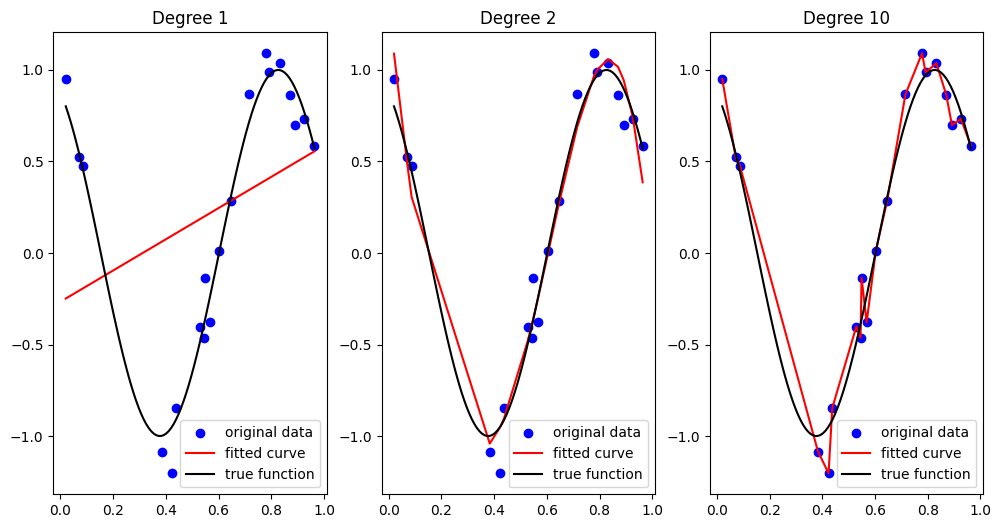

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.figure(figsize=(12, 6))
for i, degree in enumerate([1,2,10]):
    features = PolynomialFeatures(degree=degree)
    linear_model = LinearRegression()
    pipeline = Pipeline([('features', features), ('linear_model', linear_model)])
    # preprocess the data
    X_poly = features.fit_transform(X)
    scaler = StandardScaler()
    X_poly_scaled = scaler.fit_transform(X_poly)
    # fit the model
    pipeline.fit(X_poly_scaled, y)
    # predict the output
    y_pred = pipeline.predict(X_poly_scaled)
    # plot the results
    subplot = plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='blue', label='original data')
    plt.plot(X, y_pred, color='red', label='fitted curve')
    X_linspace = np.linspace(X.min(), X.max(), 100)
    plt.plot(X_linspace, func(X_linspace), color='black', label='true function')
    plt.legend(loc='best')
    plt.title(f'Degree {degree}')
    # cross validation
    scores = cross_val_score(pipeline, X_poly_scaled, y, cv=20,
                             scoring = 'neg_mean_squared_error')
    print(f'Degree {degree}: MSE score = {scores.mean()}')

plt.show()